In [159]:
import gensim
import jgraph as ig

import pandas as pd
import numpy as np
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib.pyplot as pl
import json
import urllib.request as urllib2
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist,correlation,cdist

from sklearn.metrics.pairwise import pairwise_distances


## Data Preprocessing

In [239]:
dataset = pd.read_csv('data.csv',sep=',')


C:\Users\Arun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
dataset.columns

Index(['applicant_uid', 'person_uid', 'company_uid', 'ats', 'applicant_ats_id',
       'photo_url', 'applicant_last_activity', 'application_uid',
       'application_ats_id', 'comments', 'cover_letter', 'current_stage',
       'gender', 'hired_date', 'application_last_activity', 'race',
       'rejected_date', 'rejection_reason_name', 'rejection_reason_type',
       'sent_date', 'source', 'sourced', 'source_type', 'status',
       'veteran_status', 'visa_status', 'withdrew_date', 'job_uid',
       'job_ats_id', 'bonus', 'brief_description', 'category', 'closed_date',
       'created_date', 'full_description', 'is_private', 'language',
       'job_last_activity', 'notes', 'opened_date', 'posting_type',
       'put_on_hold_date', 'referral_bonus', 'region', 'source.1', 'status.1',
       'subsidiary_name', 'title', 'type'],
      dtype='object')

In [16]:
#size of data
size= len(dataset)
size

20762

In [9]:
#Which column has Nan
pd.isnull(dataset).sum() > 0
    

applicant_uid                False
person_uid                    True
company_uid                  False
ats                          False
applicant_ats_id             False
photo_url                     True
applicant_last_activity       True
application_uid              False
application_ats_id           False
comments                      True
cover_letter                  True
current_stage                 True
gender                        True
hired_date                    True
application_last_activity    False
race                          True
rejected_date                 True
rejection_reason_name         True
rejection_reason_type         True
sent_date                    False
source                        True
sourced                       True
source_type                   True
status                       False
veteran_status                True
visa_status                   True
withdrew_date                 True
job_uid                      False
job_ats_id          

In [674]:
Count_vals= dataset.count()

Count_vals = Count_vals.to_frame()

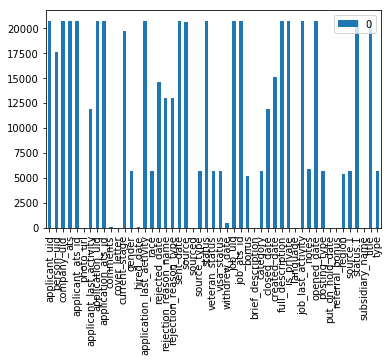

In [41]:
#Count plot for columns
Count_vals.plot.bar()
plt.show()

In [240]:
#Intial feature map and plans
"""
Features to use
'applicant_uid'
'title'

"""
"""
Others:
'cover_letter'- 'full_description' - Similarity
"""

"""
Drop:
'photo_url'
'application_uid'
'application_ats_id'
'gender',
'race',
'rejected_date', 'rejection_reason_name', 'rejection_reason_type',
'sourced', 'source_type', 'status',
'veteran_status', 'visa_status', 'withdrew_date', 'job_uid',
'job_ats_id', 'bonus', 'brief_description', 'category', 'closed_date',
'created_date', 'full_description', 'is_private', 'language',
'job_last_activity', 'notes', 'opened_date', 'posting_type',
'put_on_hold_date', 'referral_bonus', 'region', 'source.1', 'status.1',
'subsidiary_name', 'type'

"""


In [ ]:
#dropping columns

dataset_copy = dataset.drop(['photo_url',
'application_uid',
'application_ats_id',
'gender',
'race',
'rejected_date', 'rejection_reason_name', 'rejection_reason_type',
'sourced', 'source_type', 'status',
'veteran_status', 'visa_status', 'withdrew_date',
'job_ats_id', 'bonus', 'brief_description', 'category', 'closed_date',
'created_date', 'full_description', 'is_private', 'language',
'job_last_activity', 'notes', 'opened_date', 'posting_type',
'put_on_hold_date', 'referral_bonus', 'region', 'source.1', 'status.1',
'subsidiary_name', 'type'],axis=1)




In [45]:
dataset.columns

Index(['applicant_uid', 'person_uid', 'company_uid', 'ats', 'applicant_ats_id',
       'applicant_last_activity', 'comments', 'cover_letter', 'current_stage',
       'hired_date', 'application_last_activity', 'sent_date', 'source',
       'title'],
      dtype='object')

In [241]:
dataset_copy = dataset_copy.drop(['person_uid','ats','applicant_ats_id','applicant_last_activity', 'comments', 'cover_letter', 'current_stage',
       'hired_date', 'application_last_activity'],axis=1)

In [55]:
data = dataset.set_index(['applicant_uid'])

#  Graph Visualization

In [759]:
k={}
for index,row in data.iterrows():
    k[index] = row['title']
 

In [771]:

#Graph visualization
G=nx.Graph()
G.add_nodes_from(list(k.keys()))

In [772]:
G.add_edges_from(list(k.items()))

G.nodes(data=True)
G.node['\\x06c63848c7800000c01734ff']['attribute']='value'
G.nodes(data=True)

[('\\x06c63848c7800000c01734ff', {'attribute': 'value'}),
 ('\\x06c63846d0400000c0173314', {}),
 ('\\x06c6386d15800000c0174aa5', {}),
 ('\\x06c638ba72800000c0178058', {}),
 ('\\x06c638a1e1000000c0177180', {}),
 ('\\x06c637b100800000c016d0e5', {}),
 ('\\x06c63a1e52400000c018654e', {}),
 ('\\x06c63a325f800000c01871e3', {}),
 ('\\x06c63a5e1a000000c0188eab', {}),
 ('\\x06c63aa31f400000c018bd95', {}),
 ('\\x06c63b1ae6400000c01908f3', {}),
 ('\\x06c63b81f3400000c0194ea4', {}),
 ('\\x06c63bb096000000c0196fd6', {}),
 ('\\x06c63bc82f400000c0197e12', {}),
 ('\\x06c63c709d800000c019e5e6', {}),
 ('\\x06c63c2e08800000c019bd74', {}),
 ('\\x06c63c5a29c00000c019da9b', {}),
 ('\\x06c63c78ce400000c019ee93', {}),
 ('\\x06c63ca9f8800000c01a0d04', {}),
 ('\\x06c63cbd81000000c01a19b4', {}),
 ('\\x06c63ce796000000c01a337f', {}),
 ('\\x06c63e035cc00000c01aebbf', {}),
 ('\\x06c63e35f8c00000c01b0e9f', {}),
 ('\\x06c63e4bafc00000c01b1d17', {}),
 ('\\x06c63e57fd000000c01b2207', {}),
 ('\\x06c63e48fc800000c01b1a43

In [774]:
nx.write_graphml(G,'newjobuser-network.graphml')
print("Use Gephi and create graph network")

Use Gephi and create graph network


Image 1 and Image 2 are attached on the email

Image 1 shows- cluster of users linked to a single job post. This is a proof of the further intuitions below that show each user applied to very few jobs and hence their count distribution was skewed.

Image 2 shows- The various blobs are titles and their associated candidates attached to them seen from a overall view of the graph

# Method 1

# # Word2Vec

In [71]:
data.columns

Index(['company_uid', 'sent_date', 'source', 'title'], dtype='object')

In [74]:
titledata = data.reset_index()

In [78]:
#Title mining
titledata = titledata.groupby('applicant_uid')['title'].apply(list)
titledata= pd.DataFrame(titledata)

title_mining= data.join(titledata,how='inner',lsuffix='_Individual', rsuffix='_Concat')


In [80]:
title_mining.columns


In [775]:
#Title Corpus
values = title_mining.reset_index()
values= values['title_Concat']
values= values.to_frame()
values = list(values['title_Concat'])

In [776]:
#Model
model = gensim.models.Word2Vec(values, size=100, window=2, min_count=1, workers=4)

In [777]:
model.wv.most_similar(['Analyst'],topn=3)


[('Technical Operations Engineer, China', 0.24572013318538666),
 ('Principle Architect', 0.22937633097171783),
 ('Sr. Manager, Engineering', 0.21690680086612701)]

## Further exploration of data

In [153]:
job_title_count = len(pd.unique(data.title.ravel()))

In [155]:
user_count = len(pd.unique(data.index))

In [154]:
print("The number of unique jobs is {}".format(job_title_count))

The number of unique jobs is 145


In [156]:
print("The number of users is {}".format(user_count))

The number of users is 18492


In [157]:
#Sparsity level 
sparsity = round(1.0- len(data)/float(user_count*job_title_count),3)

In [158]:
print( "The sparsity level of the dataset is {} %".format(sparsity*100))

The sparsity level of the dataset is 99.2 %


In [227]:
data_processing = data.reset_index()

In [228]:
data_processing.columns

Index(['applicant_uid', 'company_uid', 'sent_date', 'source', 'title'], dtype='object')

In [780]:
User_grouped= dataset_copy.groupby(['applicant_uid', 'title']).size()


In [781]:
User_grouped= User_grouped.reset_index()

In [782]:
User_grouped.columns= ['applicant_uid', 'title', 'score']

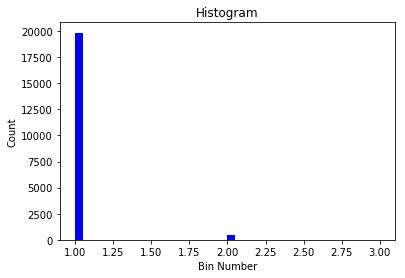

In [789]:
plt.hist(User_grouped['score'],bins=40, histtype = 'bar', facecolor = 'blue')
plt.ylabel("Count")
plt.xlabel("Bin Number")
plt.title("Histogram")
plt.show()

This proves our above graph data analysis that most users didnot apply to the same titled job post frequently. More data can better enhance our interpretability

In [785]:
def wor2vecc(title):
    #Scoring function for matrix factorisation
    L= model.wv.most_similar([title],topn=1) 
    return L[0][1] * 10000

In [624]:
User_grouped['similarity']=0

In [625]:
k={}
for index,row in User_grouped.iterrows():
    
    k[index] = wor2vecc(row['title'])

    

In [626]:
simmatrix= pd.DataFrame(list(k.items()))  

In [627]:
simmatrix.index

RangeIndex(start=0, stop=20292, step=1)

In [631]:
final_eval = User_grouped.join(simmatrix)

In [640]:
final_eval= final_eval.drop([0],axis=1)

In [641]:
final_eval.columns = ['applicant_uid', 'title', 'count', 'similarity', 'transsim'] 

In [642]:
final_eval.columns 

Index(['applicant_uid', 'title', 'count', 'similarity', 'transsim'], dtype='object')

In [643]:
#DataFrame containing id, title and similairty
final_eval= final_eval.drop(['similarity'],axis=1)

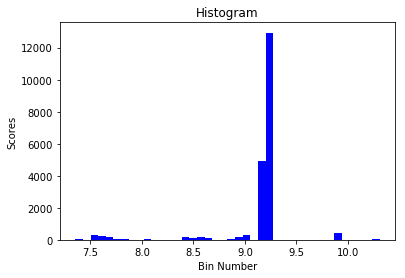

In [790]:
plt.hist(np.log((final_eval['count'])*(final_eval['transsim'])),bins=40, histtype = 'bar', facecolor = 'blue')
plt.ylabel("Scores")
plt.xlabel("Bin Number")
plt.title("Histogram")
plt.show()

The sparseness and the close count of applications of same titled job posts and the word similarity between the titles is the reason for the above broken histogram. Increase in variance as we collect more data can help improve this. Applying necessary transformations can also help in normally distributing the count data. Log transformation is something that is usually applied along with this.

In [722]:
final_eval['score']=np.log((final_eval['count'])*(final_eval['transsim']))

In [723]:
final_eval= final_eval.fillna(0)


In [724]:
#Create pivot table
UAM = pd.pivot_table(final_eval, values= 'score', index='applicant_uid', columns= 'title')

## ALS

In [727]:
#Create pivot table
UAM = pd.pivot_table(final_eval, values= 'score', index='applicant_uid', columns= 'title',fill_value=0)

ALS- ALternating Least Squares has been well known to work well with sparse data. The convergence of this method is quick and effecient and quite useful when dealing with sparse datasets

In [786]:
f = 20 #latentfactors
regLamba = 0.1 #regularisation parameter
iters = 20 #iterations


In [787]:
def normaliseRow(x):
    return x / sum(x)

def initialiseMatrix(n, f):
    A = abs(np.random.randn(n, f))
    return np.apply_along_axis(normaliseRow, 1, A)

In [788]:
n= job_title_count
m= user_count

In [732]:
# Initialise Y matrix, n x f
Y = initialiseMatrix(n, f)
# Initialise X matrix, m x f
X = initialiseMatrix(m, f)



In [733]:
UAM = UAM.fillna(0).as_matrix()
UAM = UAM[0:m,0:n]

In [734]:
def ratingsPred(X, Y):
    return np.dot(X, Y.T)

def MSE(ratingsPred, ratingsMatrix):
    idx = ratingsMatrix > 0
    return sum((ratingsPred[idx] - ratingsMatrix[idx]) ** 2) / np.count_nonzero(ratingsMatrix)
    


In [735]:
nonZero = UAM > 0
reg = regLamba * np.eye(f,f)


In [736]:
for k in range(1, iters):
    for i in range(1, m):
        idx = nonZero[i,:]
        a = Y[idx,]
        b = np.dot(np.transpose(Y[idx,]), UAM[i, idx])
        updateX = np.linalg.solve(np.dot(np.transpose(a), a) + reg, b)
        X[i,] = updateX
    
    for j in range(1, n):
        idx = nonZero[:,j]
        a = X[idx,]
        b = np.dot(np.transpose(X[idx,]), UAM[idx, j])
        updateY = np.linalg.solve(np.dot(np.transpose(a), a) + reg, b)
        Y[j,] = updateY
        
    ratingsP = ratingsPred(X, Y)
    mse = MSE(ratingsP, UAM)
    print("MSE: " + str(mse))
        
print("Done")

MSE: 0.0643351602798
MSE: 0.0579141853143
MSE: 0.057882631344
MSE: 0.0578709927482
MSE: 0.0578633697371
MSE: 0.0578576363636
MSE: 0.0578529200815
MSE: 0.0578488179363
MSE: 0.0578451061914
MSE: 0.0578416516733
MSE: 0.0578383693387
MSE: 0.0578352013867
MSE: 0.0578321081017
MSE: 0.0578290618576
MSE: 0.0578260427802
MSE: 0.0578230362747
MSE: 0.0578200316823
MSE: 0.0578170213719
MSE: 0.0578140000354
Done


In [683]:
#Create pivot table
UAM = pd.pivot_table(final_eval, values= 'score', index='applicant_uid', columns= 'title',fill_value=0)

In [742]:
from sklearn.metrics.pairwise import pairwise_distances
item_similarity = pairwise_distances(UAM.T, metric='cosine')
user_similarity = pairwise_distances(UAM, metric='cosine')

In [738]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [743]:
item_prediction = predict(UAM, item_similarity, type='item')
user_prediction= predict(UAM, user_similarity, type='user')

In [740]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [744]:
print('Item-based CF RMSE: ' + str(rmse(item_prediction, UAM)))

print('User-based CF RMSE: ' + str(rmse(user_prediction, UAM)))

Item-based CF RMSE: 9.107015985574906
User-based CF RMSE: 9.087146419426938


# Other ideas that could be tried

Other Idea could be 
1. Using case based reasoningcan work well with the sparse and little data
2. SGD can also be tried when the sparseness is considerably reduced with more data
3. Hybrid recommendation systems can be used
4. Usage of distributed systems like Hadoop , Spark and Lucene can help scale effeciently
5. Browse maps is also one possible model that can help improve effeciency of our recommendation system